In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, ttest_ind
from sklearn.metrics import cohen_kappa_score


In [2]:
data = pd.read_csv("issue-v2-description-scored.csv", sep=',')

data['created'] = pd.to_datetime(data['created'], format='%a, %d %b %Y %H:%M:%S %z')
data['resolved'] = pd.to_datetime(data['resolved'], format='%a, %d %b %Y %H:%M:%S %z')

data['duration'] = (data['resolved'] - data['created']).dt.total_seconds() / 3600  # in hours

print(data['roberta'].value_counts())
print(data['bert'].value_counts())


roberta
neutral     582
negative    321
positive     23
Name: count, dtype: int64
bert
neutral     578
negative    306
positive     42
Name: count, dtype: int64


## Descriptive Statistics

project
camel     137
hadoop    197
hbase     171
impala    197
thrift    224
dtype: int64
roberta  negative  neutral  positive
project                             
camel          37       92         8
hadoop         58      136         3
hbase          73       97         1
impala         58      137         2
thrift         95      120         9
project  roberta 
camel    negative     1216.935728
         neutral      4204.631754
         positive     5204.590833
hadoop   negative     5105.029952
         neutral      4708.799865
         positive    16812.067778
hbase    negative     4124.369756
         neutral      4765.256280
         positive    81049.888611
impala   negative     4808.748755
         neutral      2966.449852
         positive      412.976806
thrift   negative     4393.717164
         neutral      5813.697919
         positive     8189.003086
Name: duration, dtype: float64


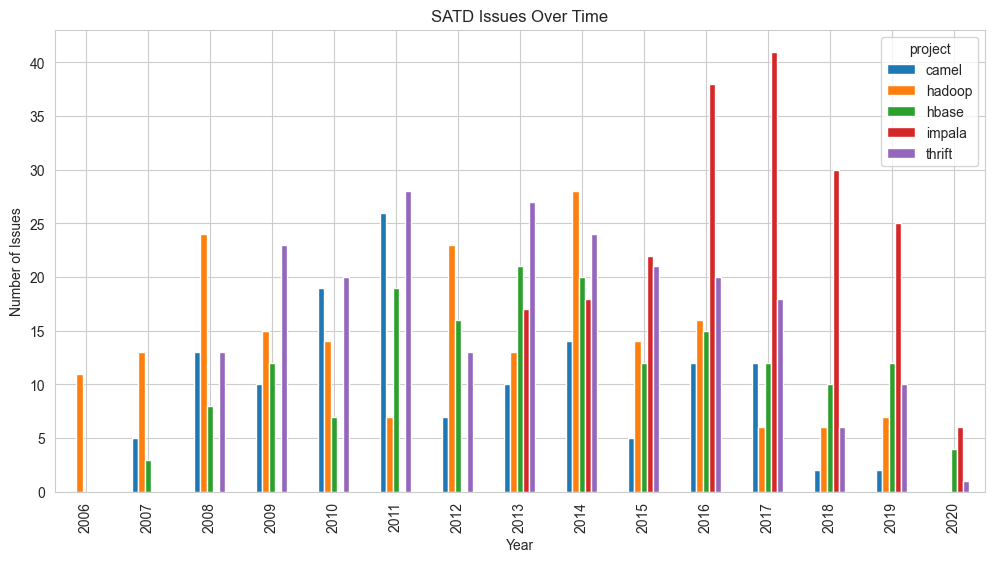

In [3]:
# Count SATD issues by project
satd_counts = data.groupby('project').size()
print(satd_counts)

# Sentiment distribution by project
sentiment_by_project = data.groupby(['project', 'roberta']).size().unstack(fill_value=0)
print(sentiment_by_project)

# Average duration by project and sentiment
avg_duration = data.groupby(['project', 'roberta'])['duration'].mean()
print(avg_duration)

data['created_year'] = data['created'].dt.year
issues_over_time = data.groupby(['project', 'created_year']).size().unstack(fill_value=0)

issues_over_time.T.plot(kind='bar', figsize=(12, 6), title="SATD Issues Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.show()


## Temporal Trends

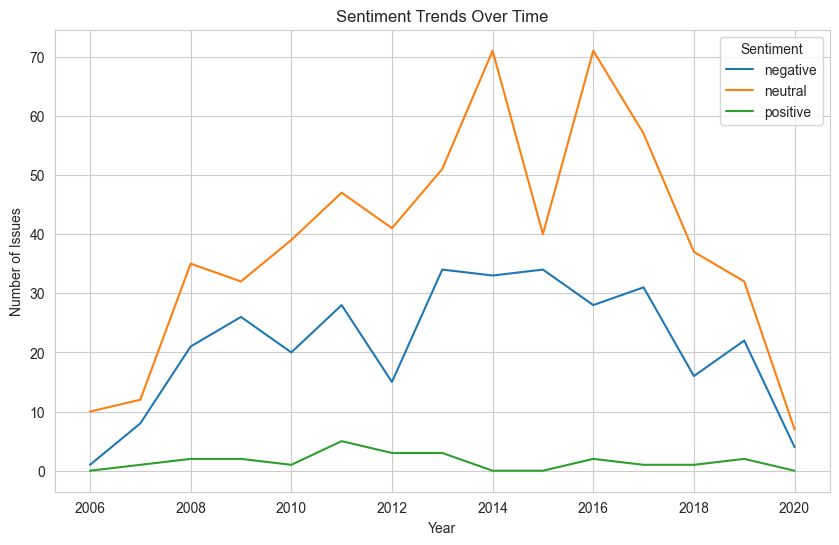

In [4]:
# Sentiment trends
sentiment_trends = data.groupby(['created_year', 'roberta']).size().unstack(fill_value=0)

sentiment_trends.plot(kind='line', figsize=(10, 6), title="Sentiment Trends Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Sentiment")
plt.show()


## Statistical Tests

In [5]:
# Spearman correlation between duration and sentiment
data['roberta_numeric'] = data['roberta'].map({'positive': 1, 'neutral': 0, 'negative': -1})
correlation, p_value = spearmanr(data['duration'], data['roberta_numeric'])
print(f"Spearman Correlation: {correlation}, P-value: {p_value}")


Spearman Correlation: 0.05334073033723853, P-value: 0.10477464017515146


In [6]:
# Contingency table: sentiment vs project
contingency_table = pd.crosstab(data['project'], data['roberta'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p}")


Chi-square statistic: 32.82710680774827, P-value: 6.616581703750165e-05


In [7]:
# Cohen's kappa for agreement
agreement = cohen_kappa_score(data['roberta'], data['bert'])
print(f"Cohen's Kappa: {agreement}")


Cohen's Kappa: 0.6861299681432038


## Separating data based on models

In [8]:
# Agreement analysis: RoBERTa vs BERT
from sklearn.metrics import confusion_matrix, cohen_kappa_score

conf_matrix = pd.crosstab(data['roberta'], data['bert'])
print("Confusion Matrix:")
print(conf_matrix)

kappa = cohen_kappa_score(data['roberta'], data['bert'])
print(f"Cohen's Kappa: {kappa}")


Confusion Matrix:
bert      negative  neutral  positive
roberta                              
negative       258       62         1
neutral         48      509        25
positive         0        7        16
Cohen's Kappa: 0.6861299681432038


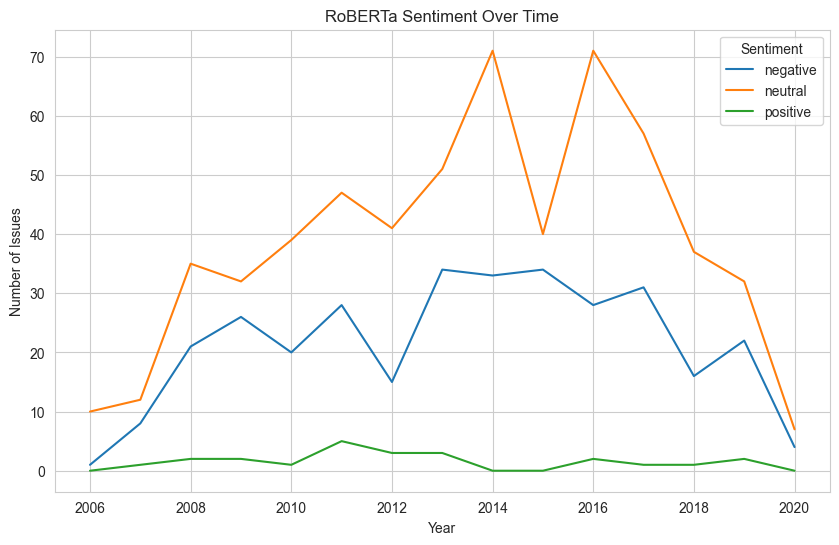

In [9]:
# RoBERTa
roberta_trends = data.groupby(['created_year', 'roberta']).size().unstack(fill_value=0)
roberta_trends.plot(kind='line', figsize=(10, 6), title="RoBERTa Sentiment Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Sentiment")
plt.show()


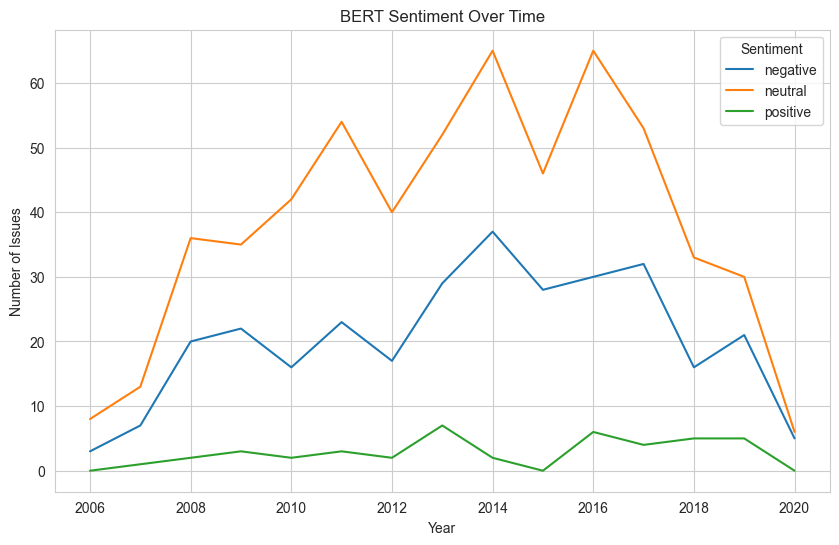

In [10]:
# BERT
bert_trends = data.groupby(['created_year', 'bert']).size().unstack(fill_value=0)
bert_trends.plot(kind='line', figsize=(10, 6), title="BERT Sentiment Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Sentiment")
plt.show()


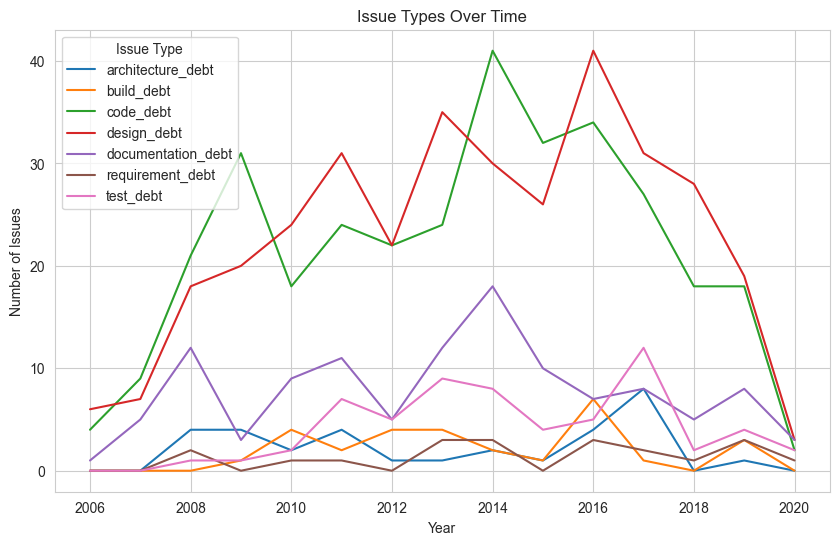

In [11]:
issue_type_trends = data.groupby(['created_year', 'classification']).size().unstack(fill_value=0)
issue_type_trends.plot(kind='line', figsize=(10, 6), title="Issue Types Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Issue Type")
plt.show()


In [12]:
disagreements = data[data['roberta'] != data['bert']]

#disagreement
disagreement_by_project = disagreements.groupby('project').size()
disagreement_by_issue_type = disagreements.groupby('classification').size()


print("Disagreements by Project:")
print(disagreement_by_project)
print("\nDisagreements by Issue Type:")
print(disagreement_by_issue_type)


Disagreements by Project:
project
camel     22
hadoop    33
hbase     23
impala    33
thrift    32
dtype: int64

Disagreements by Issue Type:
classification
architecture_debt      5
build_debt             3
code_debt             63
design_debt           42
documentation_debt    17
requirement_debt       2
test_debt             11
dtype: int64


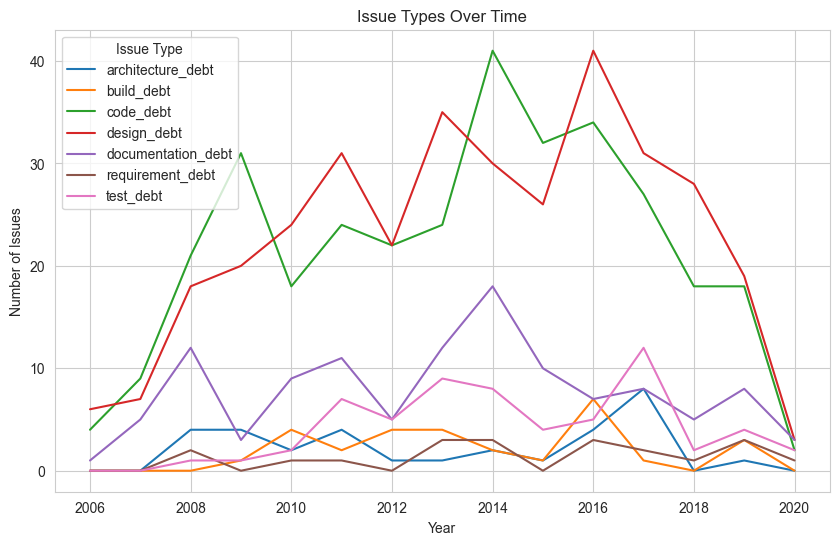

In [13]:
#Volume and Nature SATD by issue type

issue_type_trends = data.groupby(['created_year', 'classification']).size().unstack(fill_value=0)
issue_type_trends.plot(kind='line', figsize=(10, 6), title="Issue Types Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Issue Type")
plt.show()


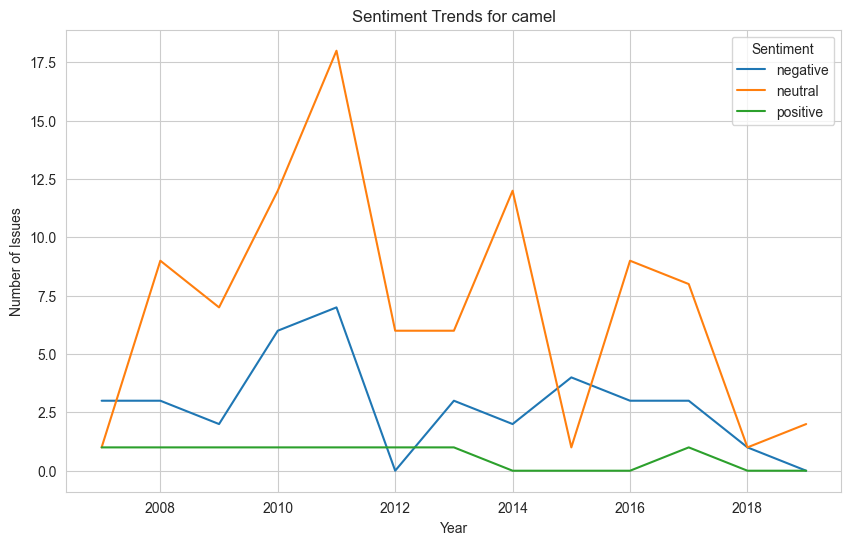

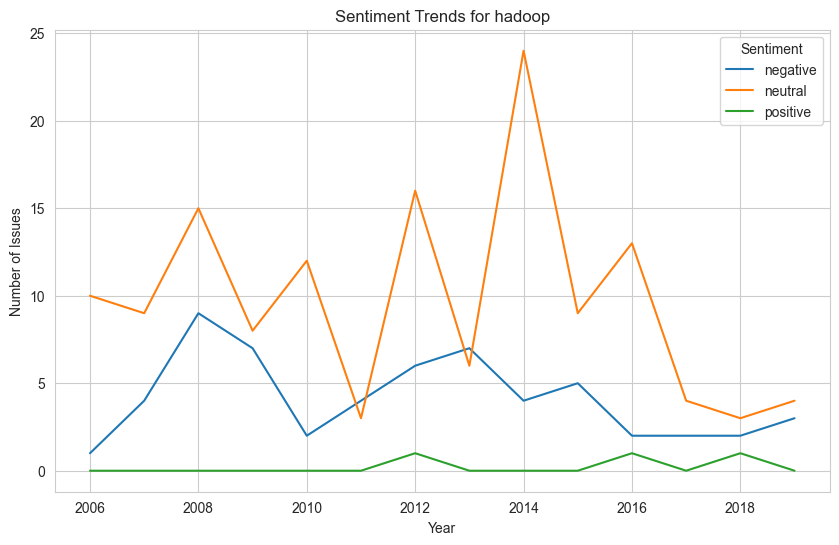

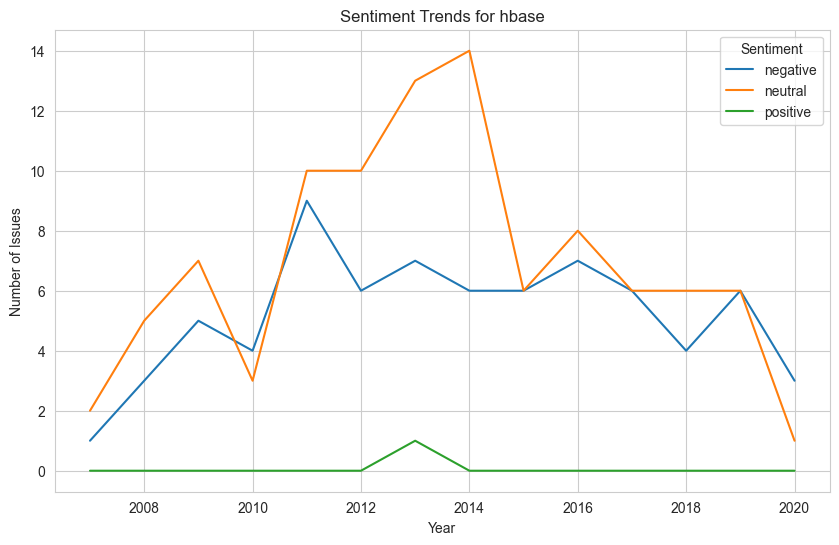

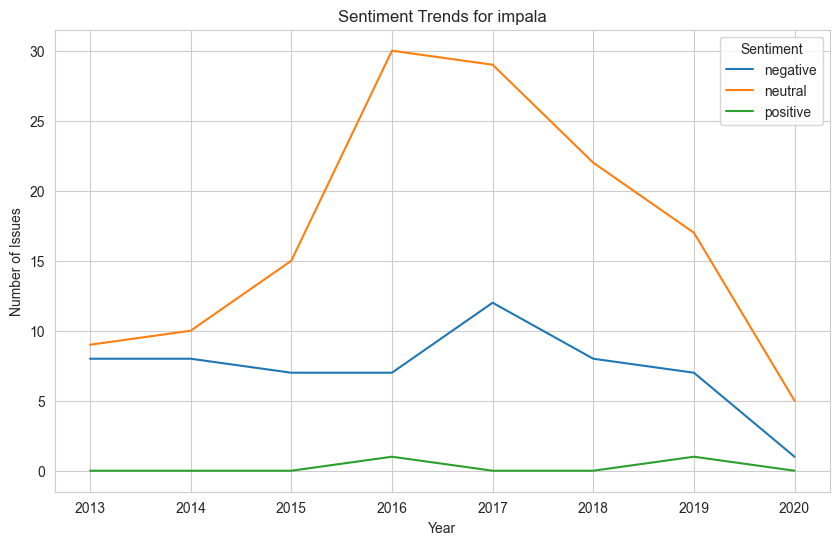

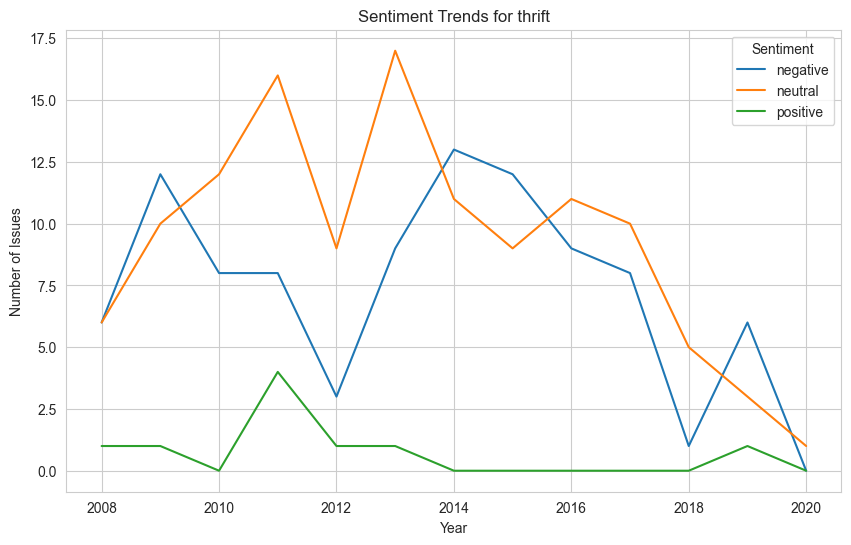

In [14]:
for project in data['project'].unique():
    project_data = data[data['project'] == project]
    sentiment_trends = project_data.groupby(['created_year', 'roberta']).size().unstack(fill_value=0)
    sentiment_trends.plot(kind='line', figsize=(10, 6), title=f"Sentiment Trends for {project}")
    plt.ylabel("Number of Issues")
    plt.xlabel("Year")
    plt.legend(title="Sentiment")
    plt.show()


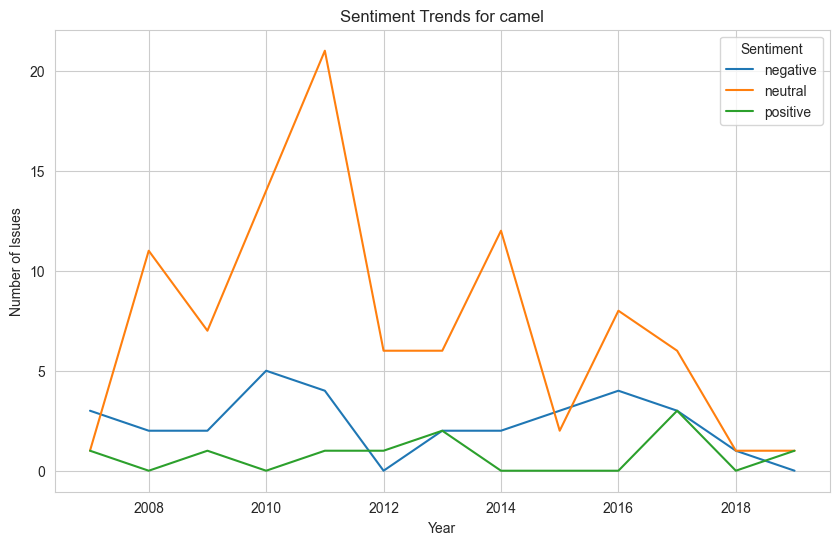

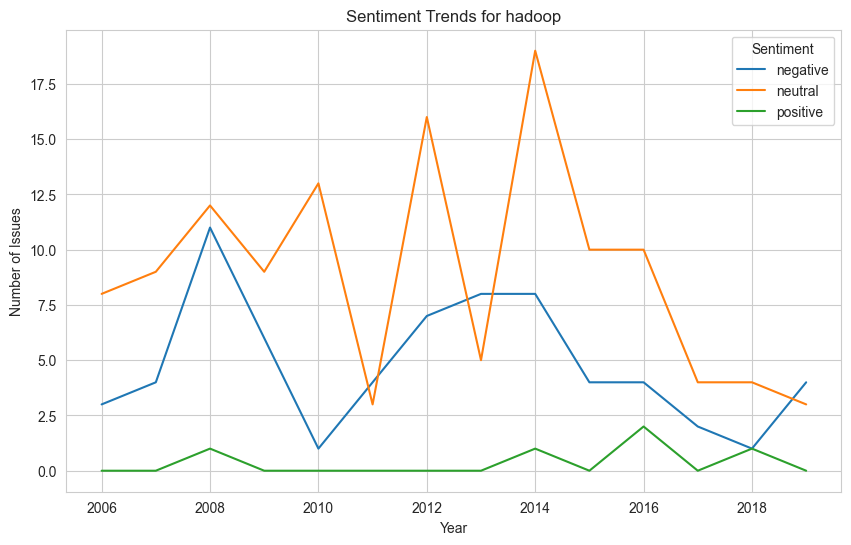

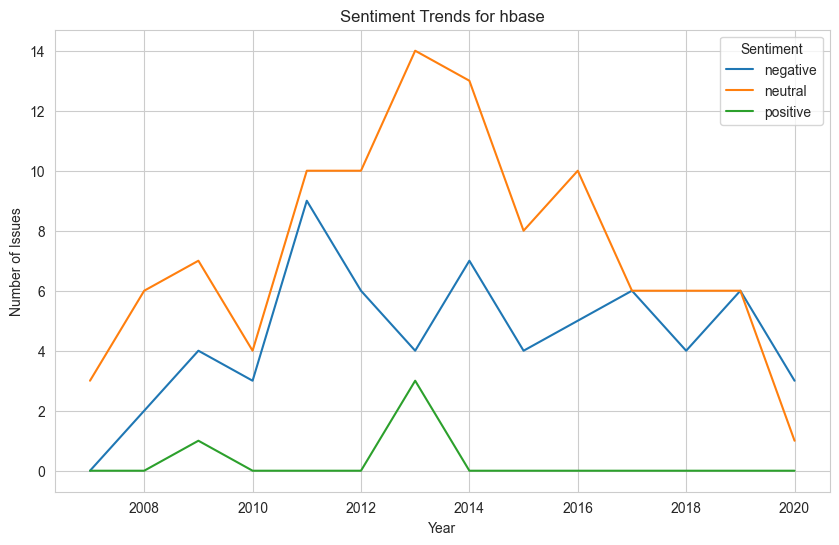

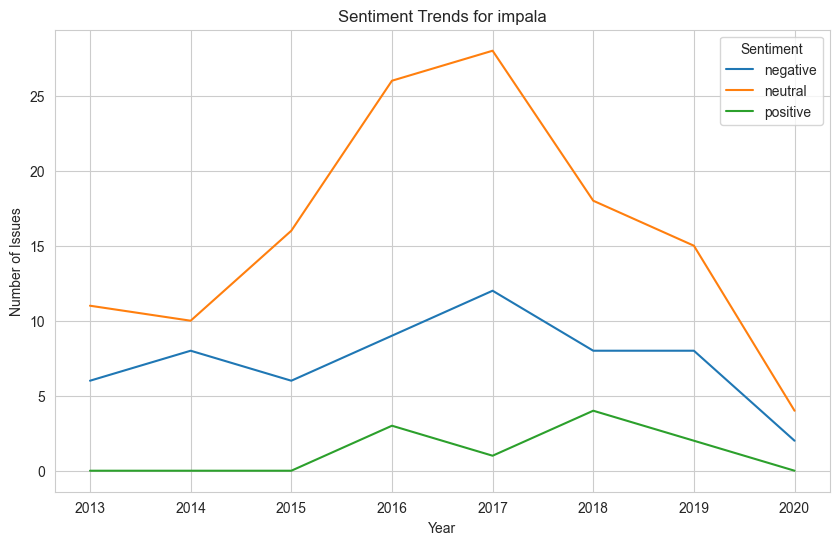

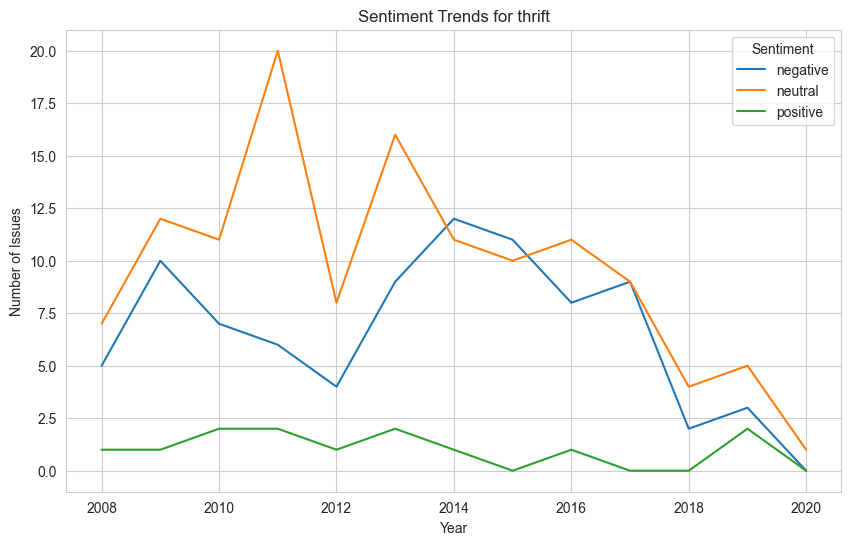

In [15]:
for project in data['project'].unique():
    project_data = data[data['project'] == project]
    sentiment_trends = project_data.groupby(['created_year', 'bert']).size().unstack(fill_value=0)
    sentiment_trends.plot(kind='line', figsize=(10, 6), title=f"Sentiment Trends for {project}")
    plt.ylabel("Number of Issues")
    plt.xlabel("Year")
    plt.legend(title="Sentiment")
    plt.show()


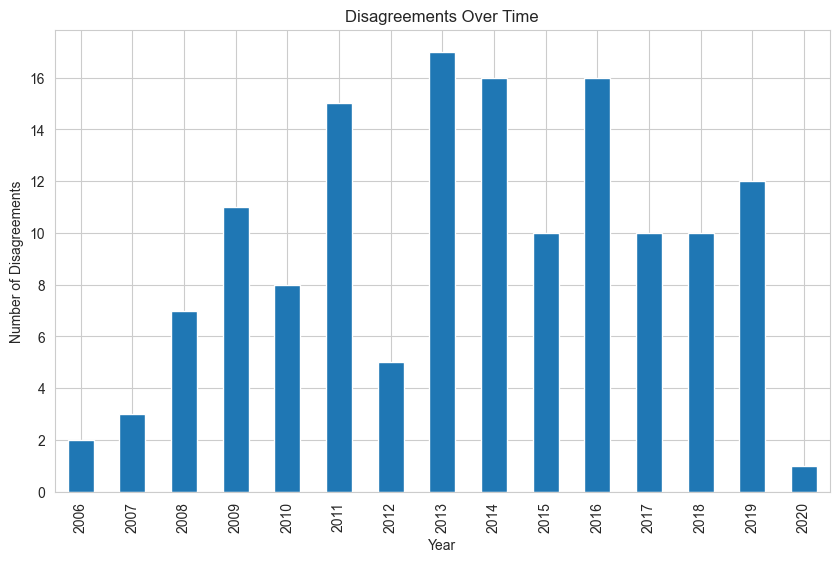

In [16]:
disagreements = data[data['roberta'] != data['bert']]
disagreement_by_year = disagreements.groupby('created_year').size()
disagreement_by_year.plot(kind='bar', figsize=(10, 6), title="Disagreements Over Time")
plt.ylabel("Number of Disagreements")
plt.xlabel("Year")
plt.show()


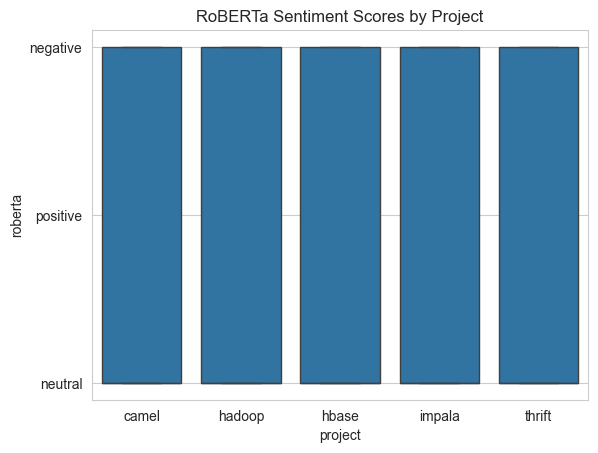

In [17]:
sns.boxplot(x='project', y='roberta', data=data)
plt.title("RoBERTa Sentiment Scores by Project")
plt.show()

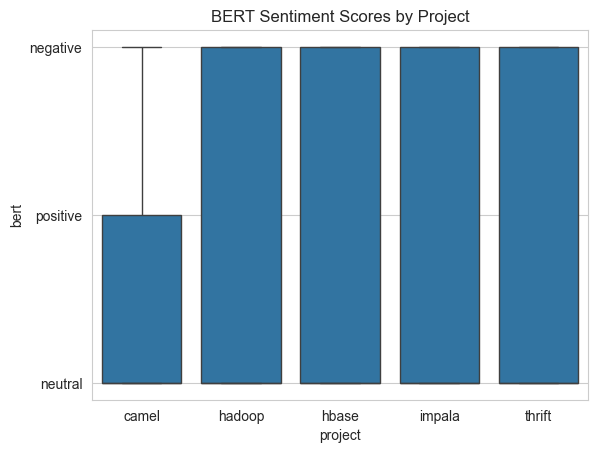

In [18]:
sns.boxplot(x='project', y='bert', data=data)
plt.title("BERT Sentiment Scores by Project")
plt.show()